Connected to Python 3.11.6

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB
None
###############################################################
linear regression metodu
       median_house_value     prediction
14416            245800.0  201882.959868
16383            137900.0  147279.682144
7731             218200.0  207796.60979

<Axes: >

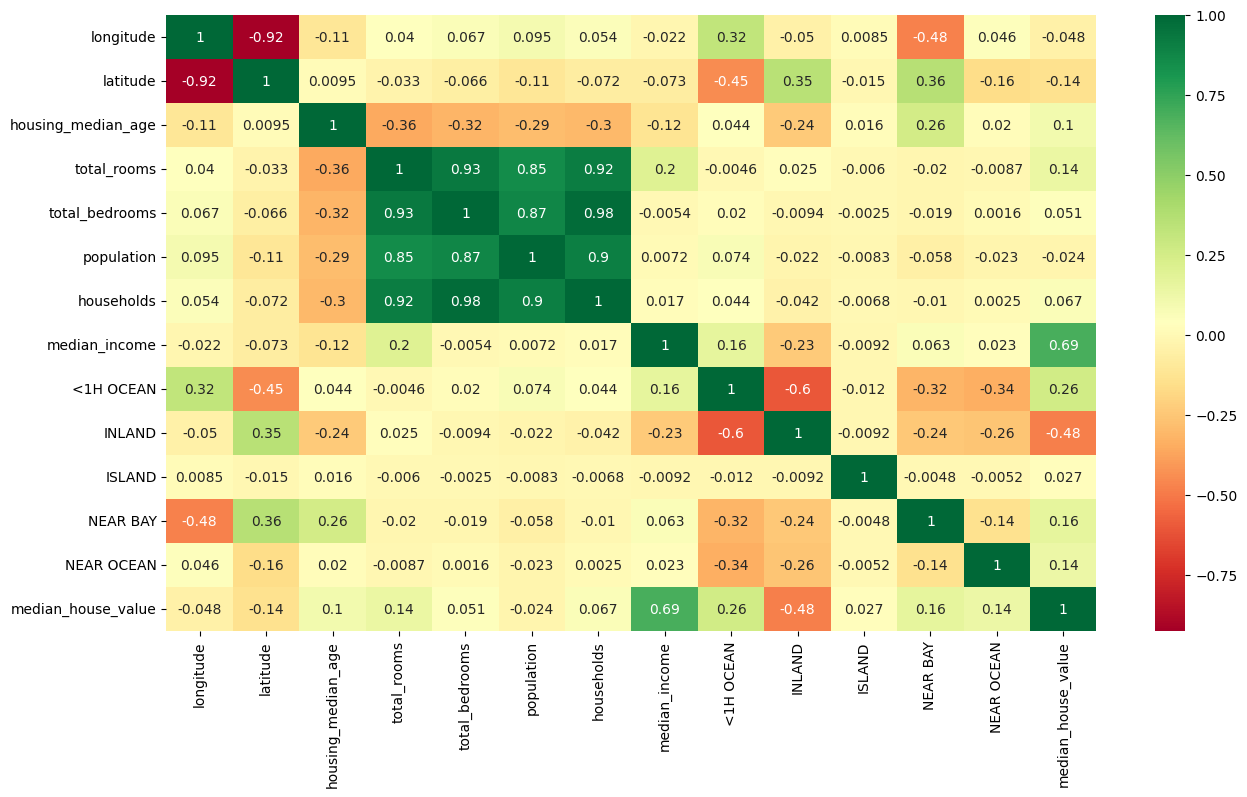

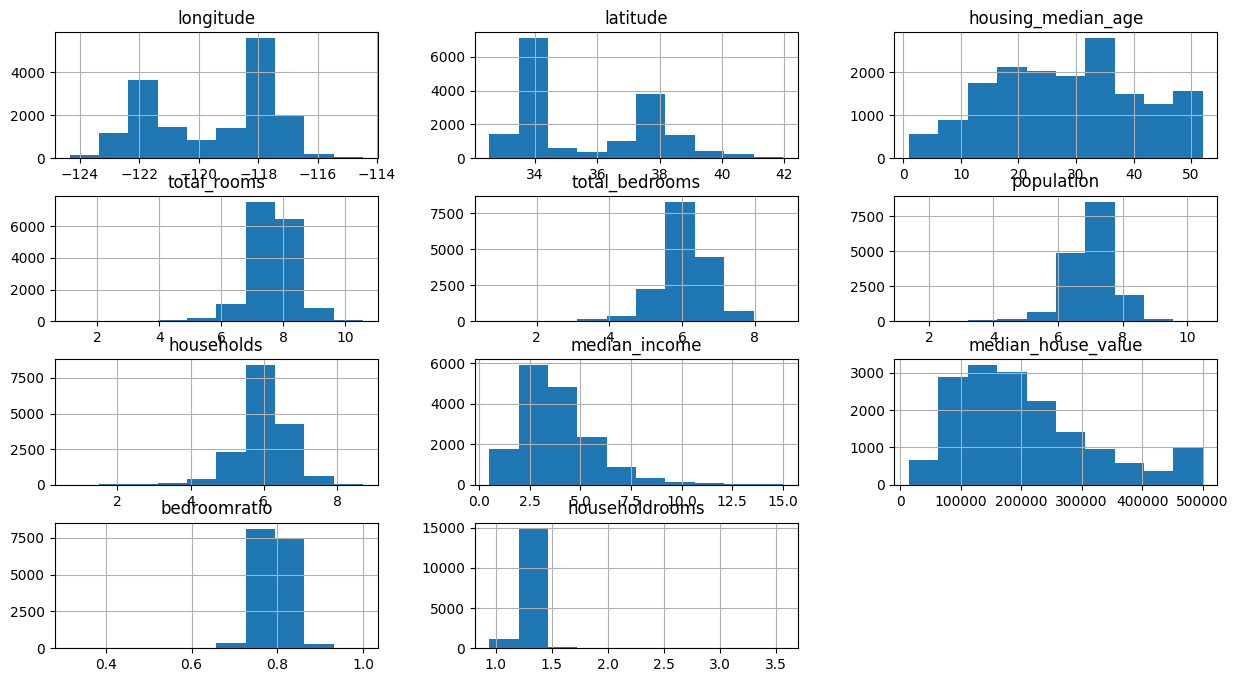

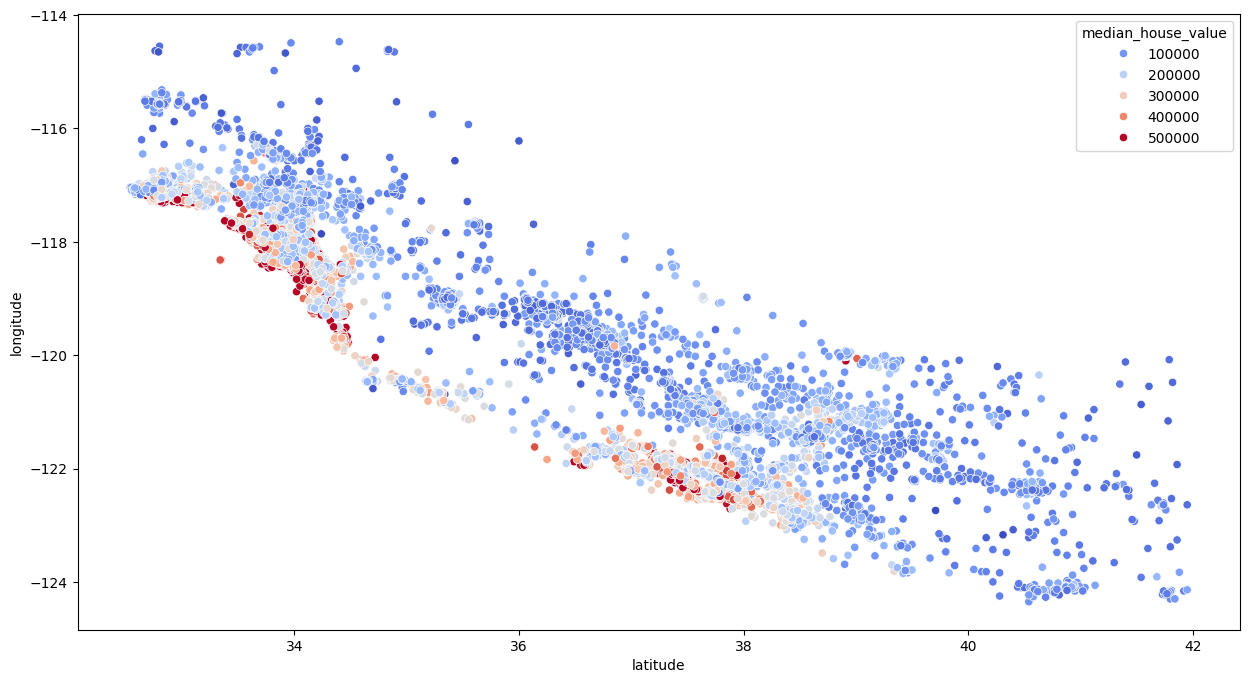

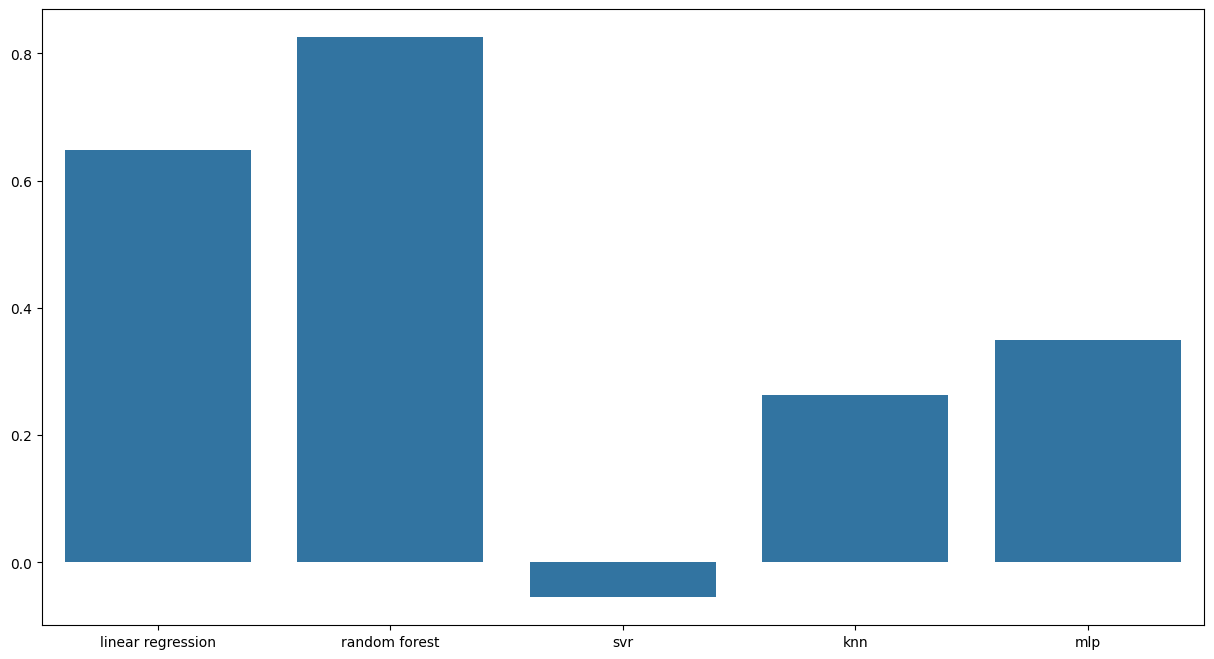

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import warnings

warnings.filterwarnings("ignore")
data=pd.read_csv('california_housing.csv')
data.dropna(inplace=True)

print(data.info())
data = data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'],axis=1)


x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
train_data=x_train.join(y_train)


plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)
train_data['bedroomratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['householdrooms']=train_data['total_rooms']/train_data['households']
train_data.hist(figsize=(15,8))

plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette="coolwarm")

# train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
# train_data['household_rooms']=train_data['total_rooms']/train_data['households']

test_data=x_test.join(y_test)
test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)
test_data['bedroomratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['householdrooms']=test_data['total_rooms']/test_data['households']    

print('###############################################################')
print('linear regression metodu')
reg=LinearRegression()
reg.fit(x_train,y_train)
reg_score=reg.score(x_test,y_test)
y_pred = reg.predict(x_test)
y_comp=pd.DataFrame(y_test)
y_comp2=y_comp.join(pd.DataFrame({'prediction':y_pred}).set_index(y_test.index))
print(y_comp2.head(25))
print('linear regression skoru:'+ f'{reg.score(x_test,y_test)}')    

print('###############################################################')
print('random forest metodu')
forest=RandomForestRegressor()
forest.fit(x_train,y_train)
forest_score=forest.score(x_test,y_test)
y_pred = forest.predict(x_test)
y_comp=pd.DataFrame(y_test)
y_comp1=y_comp.join(pd.DataFrame({'prediction':y_pred}).set_index(y_test.index))
print(y_comp1.head(25))
print('random forest skoru:'+ f'{forest.score(x_test,y_test)}')

print('###############################################################')
print('svr metodu')
svr=SVR()
svr.fit(x_train,y_train)
svr_score=svr.score(x_test,y_test)
y_pred = svr.predict(x_test)
y_comp=pd.DataFrame(y_test)
y_comp3=y_comp.join(pd.DataFrame({'prediction':y_pred}).set_index(y_test.index))
print(y_comp3.head(25))
print('svr skoru:'+ f'{svr.score(x_test,y_test)}')

print('###############################################################')
print('knn metodu')
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_score=knn.score(x_test,y_test)
y_pred = knn.predict(x_test)
y_comp=pd.DataFrame(y_test)
y_comp4=y_comp.join(pd.DataFrame({'prediction':y_pred}).set_index(y_test.index))
print(y_comp4.head(25))
print('knn skoru:'+ f'{knn.score(x_test,y_test)}')

print('###############################################################')
print('mlp metodu')
mlp=MLPRegressor()
mlp.fit(x_train,y_train)
mlp_score=mlp.score(x_test,y_test)
y_pred = mlp.predict(x_test)
y_comp=pd.DataFrame(y_test)
y_comp5=y_comp.join(pd.DataFrame({'prediction':y_pred}).set_index(y_test.index))
print(y_comp5.head(25))
print('mlp skoru:'+ f'{mlp.score(x_test,y_test)}') 


print('###############################################################')

y=[reg_score,forest_score,svr_score,knn_score,mlp_score]
x=['linear regression','random forest','svr','knn','mlp']
plt.figure(figsize=(15,8))
sns.barplot(x=x,y=y)

# param_grid = { 
#     "n_estimators": [200, 500],
#     "max_features": ["auto", "sqrt", "log2"],
# }
# grid = GridSearchCV(forest, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
# grid.fit(x_train, y_train)  


# param_grid = { 
#     "n_estimators": [100, 500],
#     "min_samples_split":[2,4,6,8],
#     "max_depth":[None,4,8]
# }
# grid = GridSearchCV(forest, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
# grid.fit(x_train, y_train)  

[Text(0.5, 1.0, 'Metodlar')]

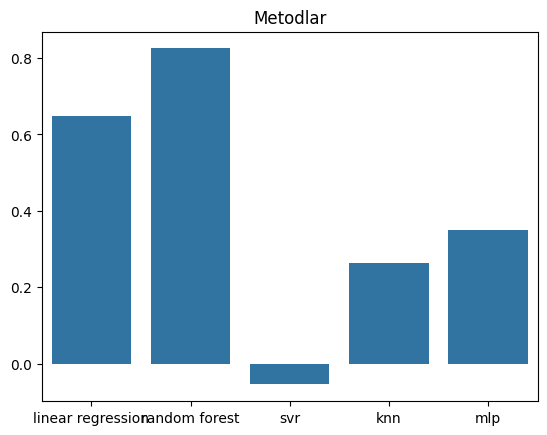

In [4]:
sns.barplot(x=x,y=y).set(title='Metodlar')

[Text(0.5, 1.0, 'Metodlar')]

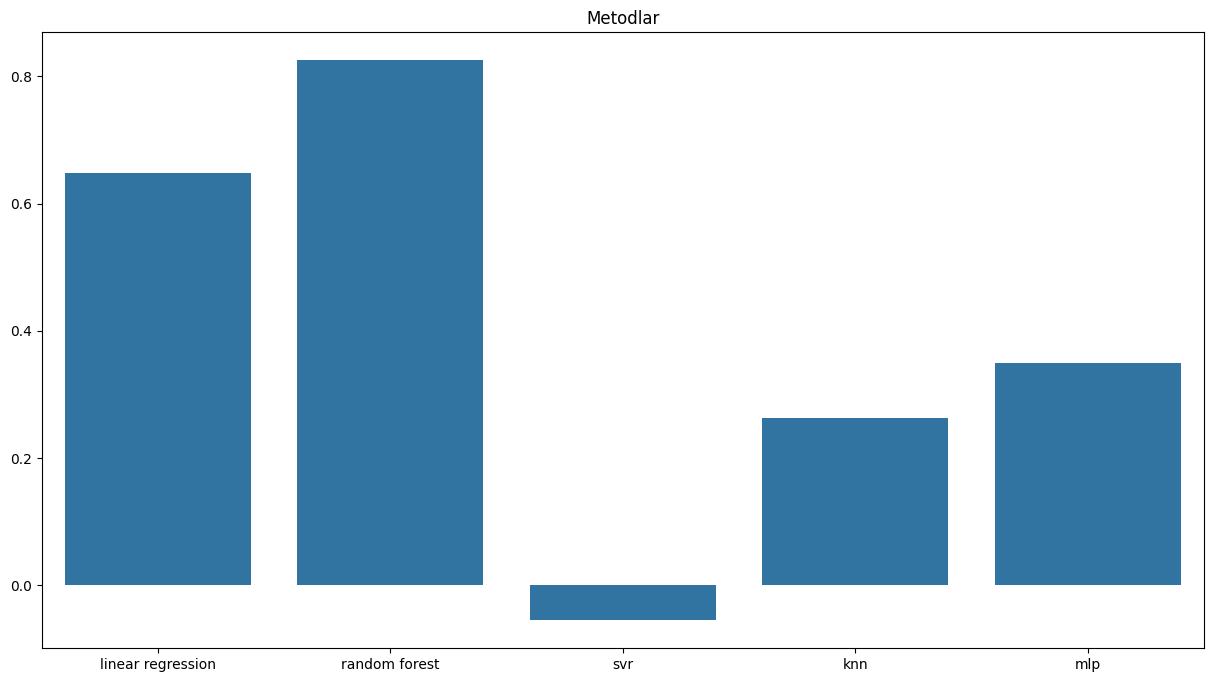

In [5]:
plt.figure(figsize=(15,8))
sns.barplot(x=x,y=y).set(title='Metodlar')